In [ ]:
                                                                                     #Everything Important from Lab 4

#Research Question:
#This project will examine Tyrese Maxey’s three-point shooting performance throughout his NBA career.
#Using season and game-level statistics from Basketball-Reference, I will analyze trends in his 3P%,
#compare performance over the years he had been in the league, and investigate whether his three-point
#efficiency varies against different teams.

#Going back to your research questions themselves, determine what type of statistical analyses you’ll need
#to answer each one.  Some examples could be ANOVA to determine if there are differences among groups, regression
#for prediction, time series analysis for forecasting, classification or clustering methods.

#Q1: Has Maxey’s three-point percentage improved, declined, or remained consistent throughout his career? Linear Regression
#Q2: Are there significant differences in Maxey’s 3P% between seasons? ANOVA
#Q3: Does Maxey shoot more efficiently against some teams compared to others? ANOVA

In [1]:
import pandas as pd
import numpy as np

In [2]:
# The past 5 years of Maxey's league data
Year_20 = pd.read_excel('Maxey2020-21.xlsx')
Year_21 = pd.read_excel('Maxey2021-22.xlsx')
Year_22 = pd.read_excel('Maxey2022-23.xlsx')
Year_23 = pd.read_excel('Maxey2023-24.xlsx')
Year_24 = pd.read_excel('Maxey2024-25.xlsx')

In [4]:
# The amount of rows and columns in each data set.
print("Year 20:", Year_20.shape) #This was the Covid season and had less games
print("Year 21:", Year_21.shape)
print("Year 22:", Year_22.shape)
print("Year 23:", Year_23.shape)
print("Year 24:", Year_24.shape)

Year 20: (73, 34)
Year 21: (83, 34)
Year 22: (83, 34)
Year 23: (83, 34)
Year 24: (83, 34)


In [5]:
#Come back and delete row 72 because it was the totals in the orginal data set
#rename 'Unnamed: 5' to 'Location' and update NaN to Home and '@' to Away

                      # Glossary ('*' = Needed for Project)
    #Rk -- Rank
    #Gcar -- Career Game Number for Player *
    #Gtm -- Season Game Number for Team *
    #GS -- Games Started *
    #MP -- Minutes Played *
    #FG -- Field Goals *
    #FGA -- Field Goal Attempts *
    #FG% -- Field Goal Percentage *
    #3P -- 3-Point Field Goals *
    #3PA -- 3-Point Field Goal Attempts *
    #3P% -- 3-Point Field Goal Percentage *
    #2P -- 2-Point Field Goals
    #2PA -- 2-Point Field Goal Attempts
    #2P% -- 2-Point Field Goal Percentage
    #eFG% -- Effective Field Goal Percentage (This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)
    #FT -- Free Throws
    #FTA -- Free Throw Attempts
    #FT% -- Free Throw Percentage
    #ORB -- Offensive Rebounds
    #DRB -- Defensive Rebounds
    #TRB -- Total Rebounds
    #AST -- Assists ** Keeping to possibly explore whether higher assist opportunities correlate with more 3PA or better 3P% **
    #STL -- Steals
    #BLK -- Blocks
    #TOV -- Turnovers
    #PF -- Personal Fouls
    #PTS -- Points *
    #GmSc -- Game Score
    #+/- -- Plus-Minus

Year_20

,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,1.0,1.0,2020-12-23,PHI,NaN,WAS,"W, 113-107",NaN,10:51:00,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,4.0,3.0
1,2.0,2.0,2.0,2020-12-26,PHI,@,NYK,"W, 109-89",NaN,08:49:00,...,1.0,2.0,3.0,0.0,0.0,1.0,0.0,2.0,1.7,2.0
2,3.0,3.0,3.0,2020-12-27,PHI,@,CLE,"L, 94-118",NaN,21:40:00,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,6.0,1.9,-14.0
3,4.0,4.0,4.0,2020-12-29,PHI,NaN,TOR,"W, 100-93",NaN,08:01:00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.4,7.0
4,5.0,5.0,5.0,2020-12-31,PHI,@,ORL,"W, 116-92",NaN,21:00:00,...,2.0,2.0,0.0,1.0,0.0,1.0,2.0,10.0,5.5,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,58.0,58.0,69.0,2021-05-11,PHI,@,IND,"L, 94-103",NaN,16:34:00,...,1.0,2.0,3.0,1.0,2.0,1.0,2.0,11.0,9.6,-1.0
69,59.0,59.0,70.0,2021-05-13,PHI,@,MIA,"L, 94-106",NaN,17:17:00,...,0.0,0.0,4.0,1.0,0.0,1.0,2.0,6.0,3.6,7.0
70,60.0,60.0,71.0,2021-05-14,PHI,NaN,ORL,"W, 122-97",NaN,22:53:00,...,5.0,5.0,6.0,2.0,0.0,0.0,4.0,8.0,9.0,11.0
71,61.0,61.0,72.0,2021-05-16,PHI,NaN,ORL,"W, 128-117",*,"1 day, 10:52:00",...,7.0,7.0,6.0,1.0,1.0,1.0,4.0,30.0,26.5,16.0


In [6]:
Year_20.dtypes

            #Data Types I need to change
#Change 'Team' to category
#Change 'Location' to Boolean
#Change 'Opp' category
#Change 'GS' to Boolean

Rk                   float64
Gcar                 float64
Gtm                  float64
Date          datetime64[ns]
Team                  object
Unnamed: 5            object
Opp                   object
Result                object
GS                    object
MP                    object
FG                   float64
FGA                  float64
FG%                  float64
3P                   float64
3PA                  float64
3P%                  float64
2P                   float64
2PA                  float64
2P%                  float64
eFG%                 float64
FT                   float64
FTA                  float64
FT%                  float64
ORB                  float64
DRB                  float64
TRB                  float64
AST                  float64
STL                  float64
BLK                  float64
TOV                  float64
PF                   float64
PTS                  float64
GmSc                 float64
+/-                  float64
dtype: object

In [7]:
   #Code to delete totals row and renaming 'Unnamed:5' to 'Location'
Year_20 = Year_20.rename(columns={'Unnamed: 5': 'Location'})
Year_20 = Year_20.drop(index=72)
Year_21 = Year_21.rename(columns={'Unnamed: 5': 'Location'})
Year_21 = Year_21.drop(index=82)
Year_22 = Year_22.rename(columns={'Unnamed: 5': 'Location'})
Year_22 = Year_22.drop(index=82)
Year_23 = Year_23.rename(columns={'Unnamed: 5': 'Location'})
Year_23 = Year_23.drop(index=82)
Year_24 = Year_24.rename(columns={'Unnamed: 5': 'Location'})
Year_24 = Year_24.drop(index=82)
Year_24

,Rk,Gcar,Gtm,Date,Team,Location,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,267.0,1.0,2024-10-23,PHI,NaN,MIL,"L, 109-124",*,"1 day, 14:59:00",...,6.0,6.0,3.0,1.0,1.0,1.0,1.0,25.0,11.1,-13.0
1,2.0,268.0,2.0,2024-10-25,PHI,@,TOR,"L, 107-115",*,"1 day, 16:54:00",...,2.0,2.0,4.0,1.0,0.0,1.0,5.0,24.0,10.9,-1.0
2,3.0,269.0,3.0,2024-10-27,PHI,@,IND,"W, 118-114 (OT)",*,"1 day, 23:47:00",...,4.0,4.0,4.0,1.0,2.0,5.0,3.0,45.0,27.2,6.0
3,4.0,270.0,4.0,2024-10-30,PHI,NaN,DET,"L, 95-105",*,"1 day, 16:04:00",...,3.0,3.0,7.0,2.0,0.0,1.0,3.0,32.0,24.5,-11.0
4,5.0,271.0,5.0,2024-11-02,PHI,NaN,MEM,"L, 107-124",*,"1 day, 13:28:00",...,2.0,2.0,6.0,3.0,0.0,3.0,2.0,23.0,16.9,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,52.0,NaN,78.0,2025-04-05,PHI,NaN,MIN,"L, 109-114",Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,52.0,NaN,79.0,2025-04-07,PHI,@,MIA,"L, 105-117",Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,52.0,NaN,80.0,2025-04-09,PHI,@,WAS,"W, 122-103",Did Not Dress,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,52.0,NaN,81.0,2025-04-11,PHI,NaN,ATL,"L, 110-124",Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#new Data frames with only needed columns
Maxey20_21 = Year_20[['Date', 'Location', 'Opp', 'Result', 'GS', 'MP', 'FG', 'FGA', 'FG%' , '3P', '3PA', '3P%', 'AST', 'PTS']].copy()
Maxey21_22 = Year_21[['Date', 'Location', 'Opp', 'Result', 'GS', 'MP', 'FG', 'FGA', 'FG%' , '3P', '3PA', '3P%', 'AST', 'PTS']].copy()
Maxey22_23 = Year_22[['Date', 'Location', 'Opp', 'Result', 'GS', 'MP', 'FG', 'FGA', 'FG%' , '3P', '3PA', '3P%', 'AST', 'PTS']].copy()
Maxey23_24 = Year_23[['Date', 'Location', 'Opp', 'Result', 'GS', 'MP', 'FG', 'FGA', 'FG%' , '3P', '3PA', '3P%', 'AST', 'PTS']].copy()
Maxey24_25 = Year_24[['Date', 'Location', 'Opp', 'Result', 'GS', 'MP', 'FG', 'FGA', 'FG%' , '3P', '3PA', '3P%', 'AST', 'PTS']].copy()
Maxey20_21

,Date,Location,Opp,Result,GS,MP,FG,FGA,FG%,3P,3PA,3P%,AST,PTS
0,2020-12-23,NaN,WAS,"W, 113-107",NaN,10:51:00,3.0,6.0,0.500,0.0,1.0,0.000,2.0,6.0
1,2020-12-26,@,NYK,"W, 109-89",NaN,08:49:00,1.0,4.0,0.250,0.0,0.0,NaN,3.0,2.0
2,2020-12-27,@,CLE,"L, 94-118",NaN,21:40:00,3.0,8.0,0.375,0.0,2.0,0.000,1.0,6.0
3,2020-12-29,NaN,TOR,"W, 100-93",NaN,08:01:00,0.0,3.0,0.000,0.0,2.0,0.000,1.0,0.0
4,2020-12-31,@,ORL,"W, 116-92",NaN,21:00:00,5.0,9.0,0.556,0.0,0.0,NaN,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-05-08,NaN,DET,"W, 118-104",*,"1 day, 11:13:00",7.0,11.0,0.636,2.0,3.0,0.667,4.0,22.0
68,2021-05-11,@,IND,"L, 94-103",NaN,16:34:00,4.0,9.0,0.444,0.0,1.0,0.000,3.0,11.0
69,2021-05-13,@,MIA,"L, 94-106",NaN,17:17:00,3.0,8.0,0.375,0.0,2.0,0.000,4.0,6.0
70,2021-05-14,NaN,ORL,"W, 122-97",NaN,22:53:00,3.0,9.0,0.333,0.0,1.0,0.000,6.0,8.0


In [10]:
                                                                                             #Project Assignment 2

In [9]:
    #Changing Location results to 'home' or 'away'
for df in [Maxey20_21, Maxey21_22, Maxey22_23, Maxey23_24, Maxey24_25]:
        df['Location'] = df['Location'].replace('@', 'Away').fillna('Home')
Maxey20_21

,Date,Location,Opp,Result,GS,MP,FG,FGA,FG%,3P,3PA,3P%,AST,PTS
0,2020-12-23,Home,WAS,"W, 113-107",NaN,10:51:00,3.0,6.0,0.500,0.0,1.0,0.000,2.0,6.0
1,2020-12-26,Away,NYK,"W, 109-89",NaN,08:49:00,1.0,4.0,0.250,0.0,0.0,NaN,3.0,2.0
2,2020-12-27,Away,CLE,"L, 94-118",NaN,21:40:00,3.0,8.0,0.375,0.0,2.0,0.000,1.0,6.0
3,2020-12-29,Home,TOR,"W, 100-93",NaN,08:01:00,0.0,3.0,0.000,0.0,2.0,0.000,1.0,0.0
4,2020-12-31,Away,ORL,"W, 116-92",NaN,21:00:00,5.0,9.0,0.556,0.0,0.0,NaN,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-05-08,Home,DET,"W, 118-104",*,"1 day, 11:13:00",7.0,11.0,0.636,2.0,3.0,0.667,4.0,22.0
68,2021-05-11,Away,IND,"L, 94-103",NaN,16:34:00,4.0,9.0,0.444,0.0,1.0,0.000,3.0,11.0
69,2021-05-13,Away,MIA,"L, 94-106",NaN,17:17:00,3.0,8.0,0.375,0.0,2.0,0.000,4.0,6.0
70,2021-05-14,Home,ORL,"W, 122-97",NaN,22:53:00,3.0,9.0,0.333,0.0,1.0,0.000,6.0,8.0


In [11]:
for df in [Maxey20_21, Maxey21_22, Maxey22_23, Maxey23_24, Maxey24_25]:
    df['GS'] = df['GS'].replace({'*': 1, 'Did Not Play': 0, 'Inactive': 0, 'Did Not Dress': 0})
    df['GS'] = df['GS'].fillna(0)
    df['GS'] = df['GS'].astype(int)

Maxey20_21

,Date,Location,Opp,Result,GS,MP,FG,FGA,FG%,3P,3PA,3P%,AST,PTS
0,2020-12-23,Home,WAS,"W, 113-107",0,10:51:00,3.0,6.0,0.500,0.0,1.0,0.000,2.0,6.0
1,2020-12-26,Away,NYK,"W, 109-89",0,08:49:00,1.0,4.0,0.250,0.0,0.0,NaN,3.0,2.0
2,2020-12-27,Away,CLE,"L, 94-118",0,21:40:00,3.0,8.0,0.375,0.0,2.0,0.000,1.0,6.0
3,2020-12-29,Home,TOR,"W, 100-93",0,08:01:00,0.0,3.0,0.000,0.0,2.0,0.000,1.0,0.0
4,2020-12-31,Away,ORL,"W, 116-92",0,21:00:00,5.0,9.0,0.556,0.0,0.0,NaN,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-05-08,Home,DET,"W, 118-104",1,"1 day, 11:13:00",7.0,11.0,0.636,2.0,3.0,0.667,4.0,22.0
68,2021-05-11,Away,IND,"L, 94-103",0,16:34:00,4.0,9.0,0.444,0.0,1.0,0.000,3.0,11.0
69,2021-05-13,Away,MIA,"L, 94-106",0,17:17:00,3.0,8.0,0.375,0.0,2.0,0.000,4.0,6.0
70,2021-05-14,Home,ORL,"W, 122-97",0,22:53:00,3.0,9.0,0.333,0.0,1.0,0.000,6.0,8.0


In [12]:
#Changing Data Types

# Year 1
Maxey20_21['Location'] = Maxey20_21['Location'].astype('category')
Maxey20_21['Opp'] = Maxey20_21['Opp'].astype('category')
Maxey20_21['GS'] = Maxey20_21['GS'].astype('boolean')
Maxey20_21['Result'] = Maxey20_21['Result'].astype('string')

# Year 2
Maxey21_22['Location'] = Maxey21_22['Location'].astype('category')
Maxey21_22['Opp'] = Maxey21_22['Opp'].astype('category')
Maxey21_22['GS'] = Maxey21_22['GS'].astype('boolean')
Maxey21_22['Result'] = Maxey21_22['Result'].astype('string')

# Year 3
Maxey22_23['Location'] = Maxey22_23['Location'].astype('category')
Maxey22_23['Opp'] = Maxey22_23['Opp'].astype('category')
Maxey22_23['GS'] = Maxey22_23['GS'].astype('boolean')
Maxey22_23['Result'] = Maxey22_23['Result'].astype('string')

# Year 4
Maxey23_24['Location'] = Maxey23_24['Location'].astype('category')
Maxey23_24['Opp'] = Maxey23_24['Opp'].astype('category')
Maxey23_24['GS'] = Maxey23_24['GS'].astype('boolean')
Maxey23_24['Result'] = Maxey23_24['Result'].astype('string')

# Year 5
Maxey24_25['Location'] = Maxey24_25['Location'].astype('category')
Maxey24_25['Opp'] = Maxey24_25['Opp'].astype('category')
Maxey24_25['GS'] = Maxey24_25['GS'].astype('boolean')
Maxey24_25['Result'] = Maxey24_25['Result'].astype('string')

Maxey24_25.dtypes

Date        datetime64[ns]
Location          category
Opp               category
Result      string[python]
GS                 boolean
MP                  object
FG                 float64
FGA                float64
FG%                float64
3P                 float64
3PA                float64
3P%                float64
AST                float64
PTS                float64
dtype: object

In [ ]:
#Project 3

In [13]:
Maxey20_21[['Win or Loss', 'Score']] = Maxey20_21['Result'].str.split(',', expand=True)
Maxey20_21[['Team_Score', 'Opponent_Score']] = Maxey20_21['Score'].str.split('-', expand=True)
Maxey20_21['Team_Score'] = pd.to_numeric(Maxey20_21['Team_Score'], errors='coerce')
Maxey20_21['Opponent_Score'] = pd.to_numeric(Maxey20_21['Opponent_Score'], errors='coerce')

Maxey21_22[['Win or Loss', 'Score']] = Maxey21_22['Result'].str.split(',', expand=True)
Maxey21_22[['Team_Score', 'Opponent_Score']] = Maxey21_22['Score'].str.split('-', expand=True)
Maxey21_22['Team_Score'] = pd.to_numeric(Maxey21_22['Team_Score'], errors='coerce')
Maxey21_22['Opponent_Score'] = pd.to_numeric(Maxey21_22['Opponent_Score'], errors='coerce')

Maxey22_23[['Win or Loss', 'Score']] = Maxey22_23['Result'].str.split(',', expand=True)
Maxey22_23[['Team_Score', 'Opponent_Score']] = Maxey22_23['Score'].str.split('-', expand=True)
Maxey22_23['Team_Score'] = pd.to_numeric(Maxey22_23['Team_Score'], errors='coerce')
Maxey22_23['Opponent_Score'] = pd.to_numeric(Maxey22_23['Opponent_Score'], errors='coerce')

Maxey23_24[['Win or Loss', 'Score']] = Maxey23_24['Result'].str.split(',', expand=True)
Maxey23_24[['Team_Score', 'Opponent_Score']] = Maxey23_24['Score'].str.split('-', expand=True)
Maxey23_24['Team_Score'] = pd.to_numeric(Maxey23_24['Team_Score'], errors='coerce')
Maxey23_24['Opponent_Score'] = pd.to_numeric(Maxey23_24['Opponent_Score'], errors='coerce')

Maxey24_25[['Win or Loss', 'Score']] = Maxey24_25['Result'].str.split(',', expand=True)
Maxey24_25[['Team_Score', 'Opponent_Score']] = Maxey24_25['Score'].str.split('-', expand=True)
Maxey24_25['Team_Score'] = pd.to_numeric(Maxey24_25['Team_Score'], errors='coerce')
Maxey24_25['Opponent_Score'] = pd.to_numeric(Maxey24_25['Opponent_Score'], errors='coerce')

Maxey20_21

,Date,Location,Opp,Result,GS,MP,FG,FGA,FG%,3P,3PA,3P%,AST,PTS,Win or Loss,Score,Team_Score,Opponent_Score
0,2020-12-23,Home,WAS,"W, 113-107",False,10:51:00,3.0,6.0,0.500,0.0,1.0,0.000,2.0,6.0,W,113-107,113,107
1,2020-12-26,Away,NYK,"W, 109-89",False,08:49:00,1.0,4.0,0.250,0.0,0.0,NaN,3.0,2.0,W,109-89,109,89
2,2020-12-27,Away,CLE,"L, 94-118",False,21:40:00,3.0,8.0,0.375,0.0,2.0,0.000,1.0,6.0,L,94-118,94,118
3,2020-12-29,Home,TOR,"W, 100-93",False,08:01:00,0.0,3.0,0.000,0.0,2.0,0.000,1.0,0.0,W,100-93,100,93
4,2020-12-31,Away,ORL,"W, 116-92",False,21:00:00,5.0,9.0,0.556,0.0,0.0,NaN,0.0,10.0,W,116-92,116,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-05-08,Home,DET,"W, 118-104",True,"1 day, 11:13:00",7.0,11.0,0.636,2.0,3.0,0.667,4.0,22.0,W,118-104,118,104
68,2021-05-11,Away,IND,"L, 94-103",False,16:34:00,4.0,9.0,0.444,0.0,1.0,0.000,3.0,11.0,L,94-103,94,103
69,2021-05-13,Away,MIA,"L, 94-106",False,17:17:00,3.0,8.0,0.375,0.0,2.0,0.000,4.0,6.0,L,94-106,94,106
70,2021-05-14,Home,ORL,"W, 122-97",False,22:53:00,3.0,9.0,0.333,0.0,1.0,0.000,6.0,8.0,W,122-97,122,97


In [14]:
Maxey20_21['Win or Loss'] = Maxey20_21['Win or Loss'].astype('category')
Maxey21_22['Win or Loss'] = Maxey21_22['Win or Loss'].astype('category')
Maxey22_23['Win or Loss'] = Maxey22_23['Win or Loss'].astype('category')
Maxey23_24['Win or Loss'] = Maxey23_24['Win or Loss'].astype('category')
Maxey24_25['Win or Loss'] = Maxey24_25['Win or Loss'].astype('category')


Maxey24_25.dtypes

Date              datetime64[ns]
Location                category
Opp                     category
Result            string[python]
GS                       boolean
MP                        object
FG                       float64
FGA                      float64
FG%                      float64
3P                       float64
3PA                      float64
3P%                      float64
AST                      float64
PTS                      float64
Win or Loss             category
Score             string[python]
Team_Score                 Int64
Opponent_Score             Int64
dtype: object

In [15]:
Maxey_0 = pd.concat([Maxey20_21, Maxey21_22, Maxey22_23, Maxey23_24, Maxey24_25],axis=0, ignore_index=True)
Maxey_0['Season'] = (['2020-21'] * len(Maxey20_21) + ['2021-22'] * len(Maxey21_22)
    + ['2022-23'] * len(Maxey22_23) + ['2023-24'] * len(Maxey23_24) + ['2024-25'] * len(Maxey24_25))
Maxey_0['Season'] = Maxey_0['Season'].astype('category')
Maxey_0

,Date,Location,Opp,Result,GS,MP,FG,FGA,FG%,3P,3PA,3P%,AST,PTS,Win or Loss,Score,Team_Score,Opponent_Score,Season
0,2020-12-23,Home,WAS,"W, 113-107",False,10:51:00,3.0,6.0,0.500,0.0,1.0,0.0,2.0,6.0,W,113-107,113,107,2020-21
1,2020-12-26,Away,NYK,"W, 109-89",False,08:49:00,1.0,4.0,0.250,0.0,0.0,NaN,3.0,2.0,W,109-89,109,89,2020-21
2,2020-12-27,Away,CLE,"L, 94-118",False,21:40:00,3.0,8.0,0.375,0.0,2.0,0.0,1.0,6.0,L,94-118,94,118,2020-21
3,2020-12-29,Home,TOR,"W, 100-93",False,08:01:00,0.0,3.0,0.000,0.0,2.0,0.0,1.0,0.0,W,100-93,100,93,2020-21
4,2020-12-31,Away,ORL,"W, 116-92",False,21:00:00,5.0,9.0,0.556,0.0,0.0,NaN,0.0,10.0,W,116-92,116,92,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2025-04-05,Home,MIN,"L, 109-114",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,109-114,109,114,2024-25
396,2025-04-07,Away,MIA,"L, 105-117",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,105-117,105,117,2024-25
397,2025-04-09,Away,WAS,"W, 122-103",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,122-103,122,103,2024-25
398,2025-04-11,Home,ATL,"L, 110-124",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,110-124,110,124,2024-25


In [73]:
Maxey = Maxey_0[[ 'Date', 'Season', 'Location', 'Opp','Score','Win or Loss', 'GS', '3P', '3PA', '3P%', 'PTS','Team_Score','Opponent_Score']].copy()
Maxey

,Date,Season,Location,Opp,Score,Win or Loss,GS,3P,3PA,3P%,PTS,Team_Score,Opponent_Score
0,2020-12-23,2020-21,Home,WAS,113-107,W,False,0.0,1.0,0.0,6.0,113,107
1,2020-12-26,2020-21,Away,NYK,109-89,W,False,0.0,0.0,NaN,2.0,109,89
2,2020-12-27,2020-21,Away,CLE,94-118,L,False,0.0,2.0,0.0,6.0,94,118
3,2020-12-29,2020-21,Home,TOR,100-93,W,False,0.0,2.0,0.0,0.0,100,93
4,2020-12-31,2020-21,Away,ORL,116-92,W,False,0.0,0.0,NaN,10.0,116,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2025-04-05,2024-25,Home,MIN,109-114,L,False,NaN,NaN,NaN,NaN,109,114
396,2025-04-07,2024-25,Away,MIA,105-117,L,False,NaN,NaN,NaN,NaN,105,117
397,2025-04-09,2024-25,Away,WAS,122-103,W,False,NaN,NaN,NaN,NaN,122,103
398,2025-04-11,2024-25,Home,ATL,110-124,L,False,NaN,NaN,NaN,NaN,110,124


In [74]:
Maxey = Maxey.set_index(['Date'])
Maxey

,Season,Location,Opp,Score,Win or Loss,GS,3P,3PA,3P%,PTS,Team_Score,Opponent_Score
Date,,,,,,,,,,,,
2020-12-23,2020-21,Home,WAS,113-107,W,False,0.0,1.0,0.0,6.0,113,107
2020-12-26,2020-21,Away,NYK,109-89,W,False,0.0,0.0,NaN,2.0,109,89
2020-12-27,2020-21,Away,CLE,94-118,L,False,0.0,2.0,0.0,6.0,94,118
2020-12-29,2020-21,Home,TOR,100-93,W,False,0.0,2.0,0.0,0.0,100,93
2020-12-31,2020-21,Away,ORL,116-92,W,False,0.0,0.0,NaN,10.0,116,92
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-05,2024-25,Home,MIN,109-114,L,False,NaN,NaN,NaN,NaN,109,114
2025-04-07,2024-25,Away,MIA,105-117,L,False,NaN,NaN,NaN,NaN,105,117
2025-04-09,2024-25,Away,WAS,122-103,W,False,NaN,NaN,NaN,NaN,122,103


In [ ]:
#Project 4

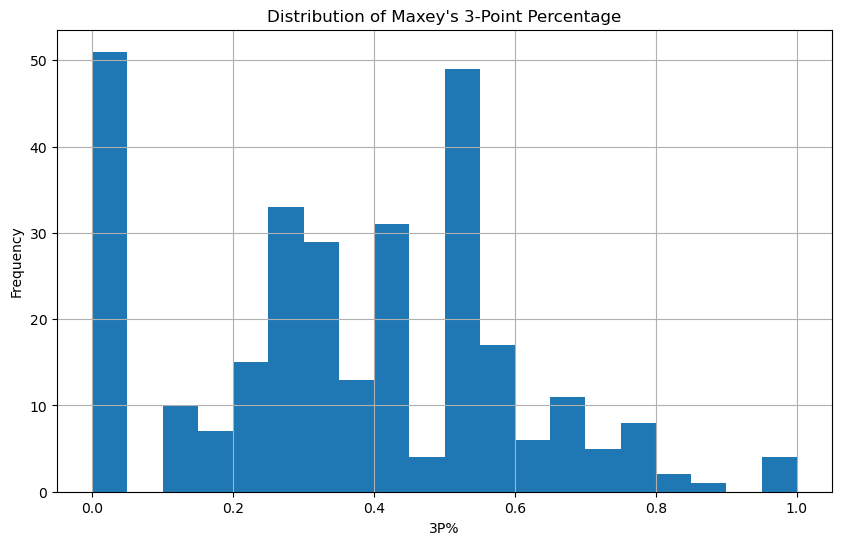

In [75]:
#Histogram of 3-Point Percentage
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
Maxey['3P%'].hist(bins=20)

plt.title("Distribution of Maxey's 3-Point Percentage")
plt.xlabel("3P%")
plt.ylabel("Frequency")
plt.show()

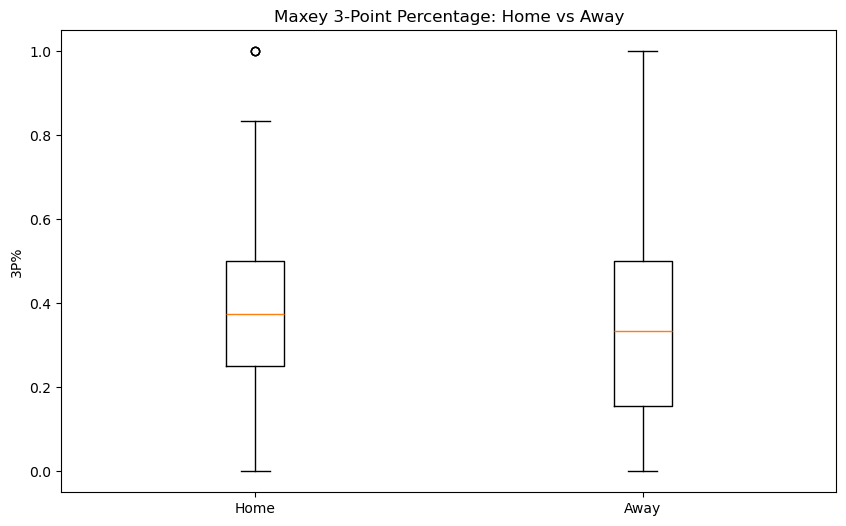

In [76]:
home_pct = Maxey.loc[(Maxey['Location'] == 'Home') & Maxey['3P%'].notna(), '3P%']
away_pct = Maxey.loc[(Maxey['Location'] == 'Away') & Maxey['3P%'].notna(), '3P%']

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot([home_pct, away_pct], tick_labels=['Home', 'Away'])

ax.set_title('Maxey 3-Point Percentage: Home vs Away')
ax.set_ylabel('3P%')

plt.show()

#Maxey shoots about the same on average no matter where he plays, but he’s noticeably more steady at home and more streaky on the road.
#The box for home games is tighter, which means his 3P% game to game doesn’t vary as much when he’s home.
#Away games have a wider spread, so he’s has some really good nights and some colder ones on the road.

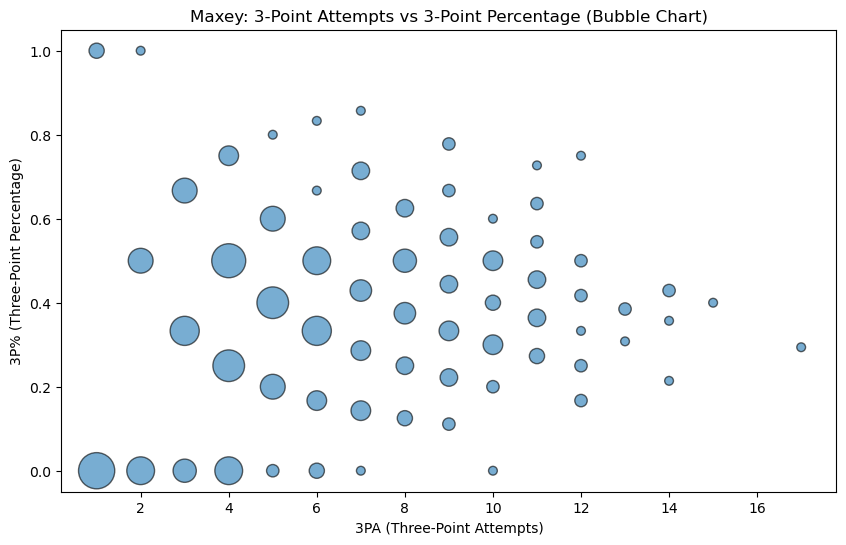

In [77]:
#  Bubble Chart for 3PA vs 3P% 

bubble_data = Maxey[Maxey['3PA'] > 0].copy()

bubble_group = (
    bubble_data.groupby(['3PA', '3P%'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(10,6))

plt.scatter(
    bubble_group['3PA'],
    bubble_group['3P%'],
    s=bubble_group['count'] * 40,
    alpha=0.6,
    edgecolors='black'
)

plt.title("Maxey: 3-Point Attempts vs 3-Point Percentage (Bubble Chart)")
plt.xlabel("3PA (Three-Point Attempts)")
plt.ylabel("3P% (Three-Point Percentage)")

plt.show()

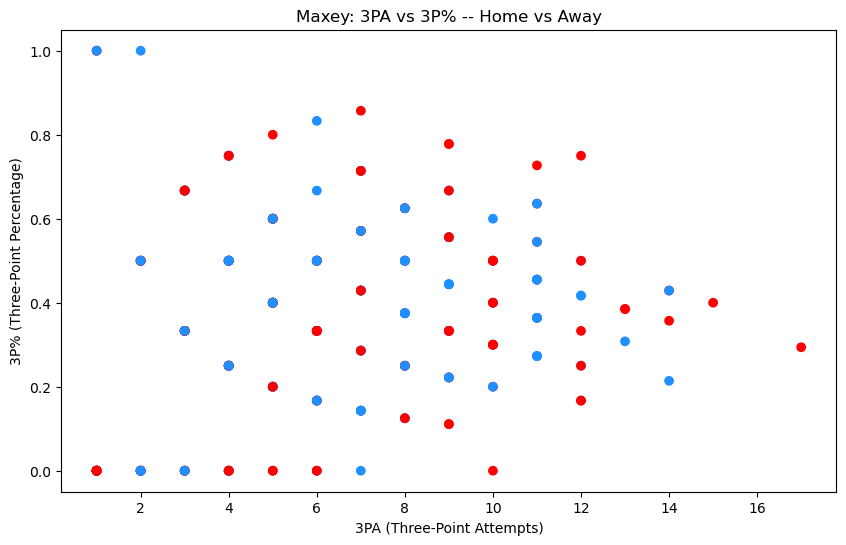

In [78]:
fig, ax = plt.subplots(figsize=(10,6))

color_map = {'Home': 'dodgerblue', 'Away': 'red'}
colors = Maxey['Location'].map(color_map)

ax.scatter(Maxey['3PA'], Maxey['3P%'], c=colors)

ax.set_title("Maxey: 3PA vs 3P% -- Home vs Away")
ax.set_xlabel("3PA (Three-Point Attempts)")
ax.set_ylabel("3P% (Three-Point Percentage)")


plt.show()

#no clear correlation between the amount of threes he takes and how many he makes

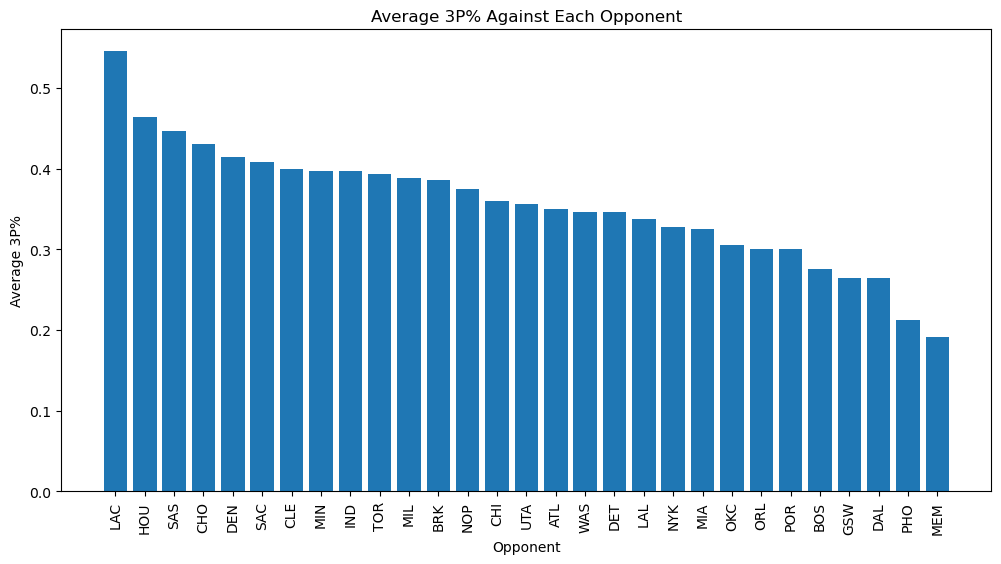

In [79]:
avg_vs_opp = Maxey.groupby('Opp', observed=False)['3P%'] \
                  .mean() \
                  .sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(avg_vs_opp.index, avg_vs_opp.values)

ax.set_title("Average 3P% Against Each Opponent")
ax.set_xlabel("Opponent")
ax.set_ylabel("Average 3P%")

plt.xticks(rotation=90)
plt.show()

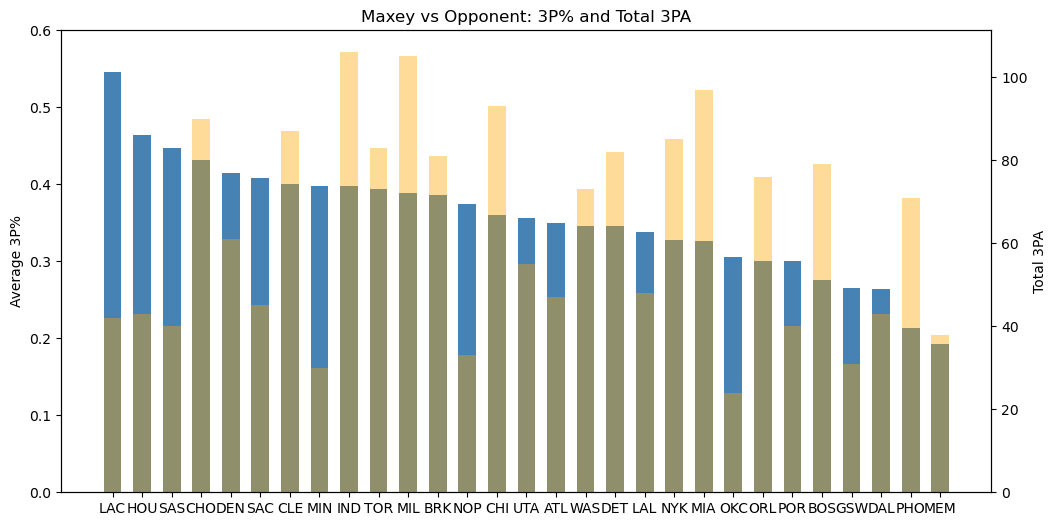

In [80]:
avg_vs_opp = Maxey.groupby('Opp', observed=False)['3P%'] \
                  .mean() \
                  .sort_values(ascending=False)

total_vs_opp = Maxey.groupby('Opp', observed=False)['3PA'] \
                    .sum() \
                    .reindex(avg_vs_opp.index)

fig, ax1 = plt.subplots(figsize=(12, 6))

bars1 = ax1.bar(avg_vs_opp.index,
                avg_vs_opp.values,
                width=0.6,
                color='steelblue',
                label='Average 3P%')

ax1.set_ylabel("Average 3P%")
ax1.set_ylim(0, 0.60)
ax1.set_title("Maxey vs Opponent: 3P% and Total 3PA")

ax2 = ax1.twinx()

bars2 = ax2.bar(avg_vs_opp.index,
                total_vs_opp.values,
                width=0.6,
                color='orange',
                alpha=0.4,
                label='Total 3PA')

ax2.set_ylabel('Total 3PA')

plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

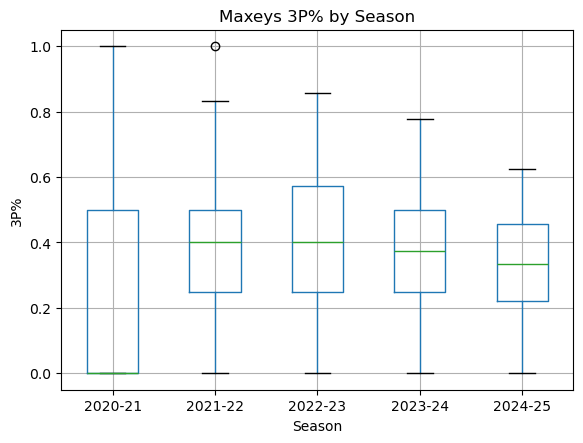

In [108]:
plt.figure(figsize=(10,6))

Maxey.boxplot(column='3P%', by='Season')
plt.title('Maxeys 3P% by Season')
plt.suptitle('')  
plt.xlabel('Season')
plt.ylabel('3P%')

plt.show()

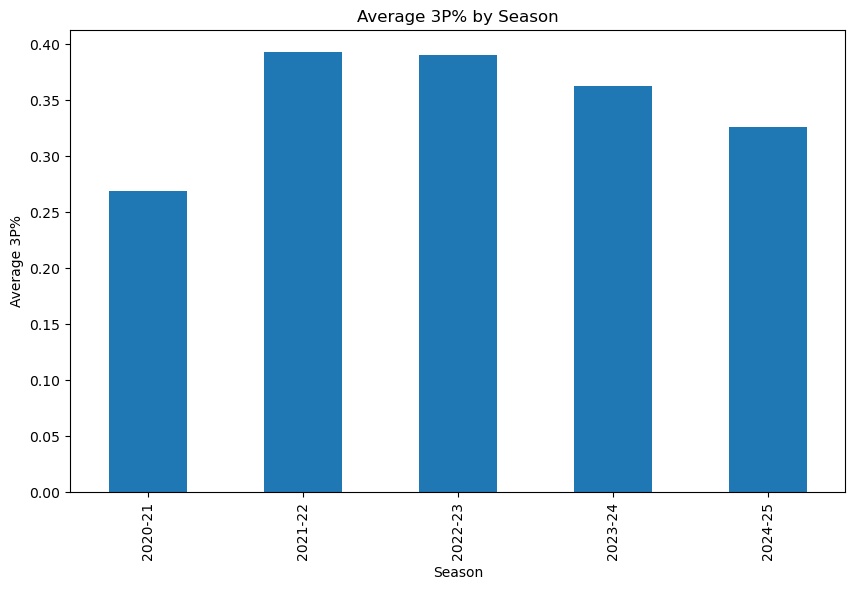

In [107]:
season_avg = Maxey.groupby('Season', observed=True)['3P%'].mean()

plt.figure(figsize=(10,6))
season_avg.plot(kind='bar')

plt.title("Average 3P% by Season")
plt.xlabel("Season")
plt.ylabel("Average 3P%")

plt.show()

In [ ]:
#Project 5

In [83]:
games_per_season = Maxey.groupby('Season', observed=True).size()
print('Games played per season:')
print(games_per_season)

Games played per season:
Season
2020-21    72
2021-22    82
2022-23    82
2023-24    82
2024-25    82
dtype: int64


In [84]:
season_summary = Maxey.groupby('Season', observed=True).agg({
    '3P%': 'mean',
    '3PA': 'mean',
    'PTS': 'mean'
})
print(season_summary)

              3P%       3PA        PTS
Season                                
2020-21  0.268857  1.688525   8.000000
2021-22  0.392889  4.120000  17.480000
2022-23  0.389533  6.150000  20.300000
2023-24  0.361986  8.128571  25.942857
2024-25  0.325923  9.192308  26.326923


In [85]:
opp_avg = Maxey.groupby('Opp', observed=True)['3P%'].mean().sort_values(ascending=False)
print(opp_avg)

Opp
LAC    0.545444
HOU    0.464400
SAS    0.446667
CHO    0.431154
DEN    0.414444
SAC    0.408000
CLE    0.399786
MIN    0.397600
IND    0.397313
TOR    0.393923
MIL    0.388600
BRK    0.385750
NOP    0.375000
CHI    0.359600
UTA    0.356143
ATL    0.349700
WAS    0.346167
DET    0.346133
LAL    0.337500
NYK    0.327417
MIA    0.325857
OKC    0.305500
ORL    0.300769
POR    0.300625
BOS    0.275500
GSW    0.264875
DAL    0.264625
PHO    0.212700
MEM    0.192000
Name: 3P%, dtype: float64


In [86]:
pivot_home_away = Maxey.pivot_table(
    values='3P%',
    index='Season',
    columns='Location',
    aggfunc='mean',
    observed=True
)

print(pivot_home_away)

#maxey had a better 3p% away for the only time in 2022-23 season, for the most part his 3p% varies from home to away games 

Location      Away      Home
Season                      
2020-21   0.188391  0.366263
2021-22   0.375083  0.410694
2022-23   0.434767  0.344300
2023-24   0.346088  0.377000
2024-25   0.319458  0.331464


In [87]:
pivot_winloss = Maxey.pivot_table(
    values='3PA',
    index='Season',
    columns='Win or Loss',
    aggfunc='count',
    observed=True
)

print(pivot_winloss)

#Amount of games maxey shot a 3 in each season:
#2020-21: 61 (Maxey did not play 30 of them)
#2021-22: 75
#2022-23: 60 (did not play 22 games that season - injured)
#2023-24: 70 (did not play 12 games that season - injured)
#2024-25: 52 (did not play 30 games that season - injured)

Win or Loss   L   W
Season             
2020-21      20  41
2021-22      30  45
2022-23      21  39
2023-24      27  43
2024-25      32  20


In [88]:
Maxey_played = Maxey[Maxey['3PA'].notna()]

ct_home_away = pd.crosstab(Maxey_played['Location'],
                           Maxey_played['Win or Loss'])
print(ct_home_away)
#out of all the games in each season maxey shot a 3 in, this shows how many the won and loss both at home and on the road

Win or Loss   L   W
Location           
Away         67  89
Home         63  99


In [89]:
ct_season_opp = pd.crosstab(Maxey['Season'], Maxey['Opp'])
print(ct_season_opp)

#shows how many games THE TEAM played against every team each season (idk if this is that useful only because my anaylsis will only be looking at the games where maxey played and shot 3's

Opp      ATL  BOS  BRK  CHI  CHO  CLE  DAL  DEN  DET  GSW  ...  NYK  OKC  ORL  \
Season                                                     ...                  
2020-21    3    3    3    3    3    3    2    2    3    2  ...    3    2    3   
2021-22    3    4    4    4    4    4    2    2    4    2  ...    4    2    4   
2022-23    4    4    4    4    3    3    2    2    3    2  ...    4    2    4   
2023-24    4    4    4    3    4    4    2    2    4    2  ...    4    2    3   
2024-25    3    4    4    4    4    3    2    2    3    2  ...    4    2    4   

Opp      PHO  POR  SAC  SAS  TOR  UTA  WAS  
Season                                      
2020-21    2    2    2    2    3    2    3  
2021-22    2    2    2    2    4    2    3  
2022-23    2    2    2    2    4    2    4  
2023-24    2    2    2    2    4    2    4  
2024-25    2    2    2    2    4    2    3  

[5 rows x 29 columns]


In [90]:
ct_season_opp = pd.crosstab(Maxey_played['Season'], Maxey_played['Opp'])

low_smpl_cols = ct_season_opp.columns[(ct_season_opp < 3).any(axis=0)]

ct_low = ct_season_opp[low_smpl_cols]
print(ct_low)

#Maxey has not played at least three games against each opponent in each season he has played

Opp      ATL  BRK  CHO  CLE  DAL  DEN  DET  GSW  HOU  LAC  ...  NYK  OKC  ORL  \
Season                                                     ...                  
2020-21    3    2    3    3    2    2    3    2    2    2  ...    2    2    3   
2021-22    3    3    3    4    2    2    4    2    0    2  ...    4    2    3   
2022-23    2    2    1    2    2    2    2    1    1    1  ...    3    1    2   
2023-24    3    3    4    4    2    1    3    1    2    2  ...    3    1    3   
2024-25    0    3    3    2    1    2    3    2    1    2  ...    2    0    3   

Opp      PHO  POR  SAC  SAS  TOR  UTA  WAS  
Season                                      
2020-21    2    2    1    1    1    1    3  
2021-22    2    2    2    1    4    2    3  
2022-23    2    2    1    2    3    2    3  
2023-24    2    1    2    2    3    2    4  
2024-25    2    2    2    1    2    1    1  

[5 rows x 26 columns]


In [ ]:
#Project 6

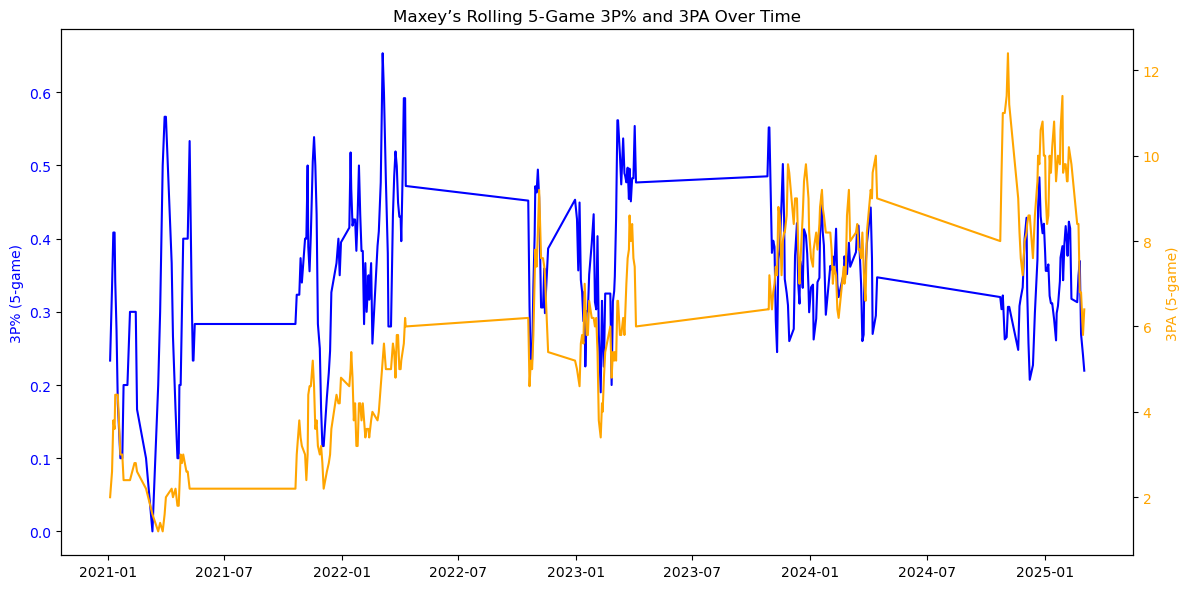

In [92]:
ts = Maxey.copy()
ts = ts[(ts['3PA'] > 0) | (ts['3P%'] > 0)]
ts = ts.sort_index()

ts['3P%_roll5'] = ts['3P%'].rolling(5).mean()
ts['3PA_roll5'] = ts['3PA'].rolling(5).mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(ts.index, ts['3P%_roll5'], color='blue', label='Rolling 3P% (5-game)')
ax1.set_ylabel("3P% (5-game)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ts.index, ts['3PA_roll5'], color='orange', label='Rolling 3PA (5-game)')
ax2.set_ylabel("3PA (5-game)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("Maxey’s Rolling 5-Game 3P% and 3PA Over Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [93]:
conference_map = {
    "ATL":"East","BOS":"East","BKN":"East","CHA":"East","CHI":"East","CLE":"East",
    "DET":"East","IND":"East","MIA":"East","MIL":"East","NYK":"East","ORL":"East",
    "PHI":"East","TOR":"East","WAS":"East",

    "DAL":"West","DEN":"West","GSW":"West","HOU":"West","LAC":"West","LAL":"West",
    "MEM":"West","MIN":"West","NOP":"West","OKC":"West","PHO":"West","POR":"West",
    "SAC":"West","SAS":"West","UTA":"West"
}

Maxey["Conference"] = Maxey["Opp"].map(conference_map)

Maxey["Conference"].value_counts()

Conference
East    213
West    150
Name: count, dtype: int64

In [94]:
from scipy.stats import f_oneway

cleaned = Maxey[Maxey['3PA'] > 0].copy()
cleaned = cleaned.dropna(subset=['3P%'])

In [95]:
#Q2: Are there significant differences in Maxey’s 3P% between seasons? (yes)

groups_season = [
    cleaned[cleaned['Season'] == season]['3P%']
    for season in cleaned['Season'].unique()
]

f_stat, p_val = f_oneway(*groups_season)
print(f_stat, p_val)

#statistically signficant 

2.5579176327530386 0.03893372646407128


In [96]:
grand_mean = cleaned['3P%'].mean()

ss_between = sum(
    len(season_group) * (season_group.mean() - grand_mean)**2
    for season_group in groups_season
)
ss_total = np.sum((cleaned['3P%'] - grand_mean)**2)

effect = ss_between / ss_total
print("Effect size:", effect)

#only accounts for 3.4% of change in 3p% from season to season

Effect size: 0.03396611821385095


In [97]:
#Q3: Does Maxey shoot more efficiently against one conference vs another? (no)

east = cleaned[cleaned['Conference'] == 'East']['3P%']
west = cleaned[cleaned['Conference'] == 'West']['3P%']

f_stat, p_val = f_oneway(east, west)
print(f_stat, p_val)

#statistically insignificant

0.018372031999673036 0.8922835700300595


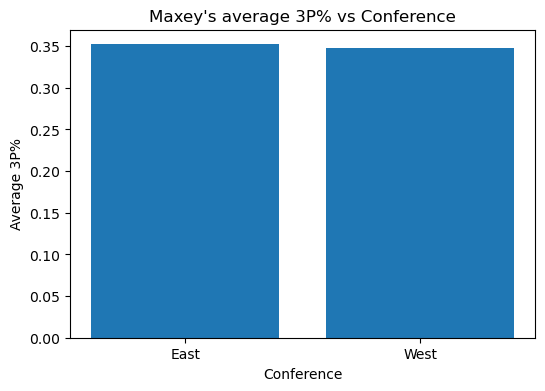

In [109]:
con = (
    cleaned
    .groupby('Conference', observed=False)['3P%']
    .mean()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(con.index, con.values)
ax.set_title('Maxey\'s average 3P% vs Conference')
ax.set_xlabel('Conference')
ax.set_ylabel('Average 3P%')
plt.show()

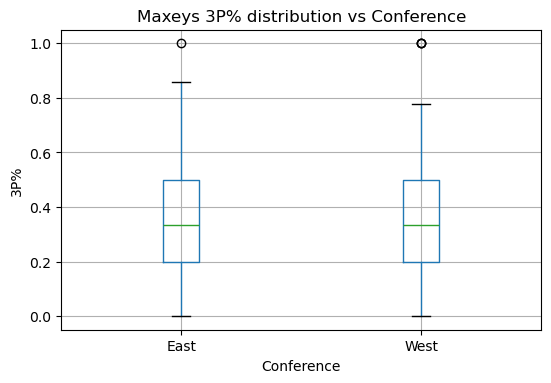

In [110]:
fig, ax = plt.subplots(figsize=(6, 4))
cleaned.boxplot(column='3P%', by='Conference', ax=ax)
ax.set_title('Maxeys 3P% distribution vs Conference')
ax.set_xlabel('Conference')
ax.set_ylabel('3P%')
plt.suptitle('')
plt.show()

In [105]:
#Q1: Has Maxey’s three-point percentage improved, declined, or remained consistent throughout his career?

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


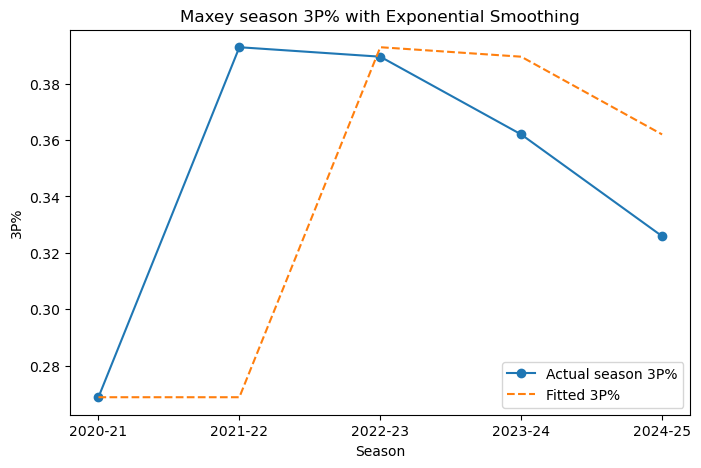

In [106]:
from statsmodels.tsa.api import ExponentialSmoothing

season_avg = (Maxey.groupby('Season', observed=False)['3P%'].mean().sort_index())

es_model = ExponentialSmoothing(season_avg,trend=None,seasonal=None).fit()
es_fitted = es_model.fittedvalues

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(season_avg.index, season_avg.values, marker='o', label='Actual season 3P%')
ax.plot(season_avg.index, ses_fitted, linestyle='--', label='Fitted 3P%')
ax.set_title('Maxey season 3P% with Exponential Smoothing')
ax.set_xlabel('Season')
ax.set_ylabel('3P%')
ax.legend()
plt.show()